<a href="https://colab.research.google.com/github/shreyavenghat25/Finlatics/blob/main/Facebook_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset- Facebook Marketplace Dataset
df = pd.read_csv('Facebook_Marketplace_data.csv')

# Drop the empty columns
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

# Convert status_published to datetime
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

# Extract hour and weekday
df['published_hour'] = df['status_published'].dt.hour
df['published_weekday'] = df['status_published'].dt.day_name()


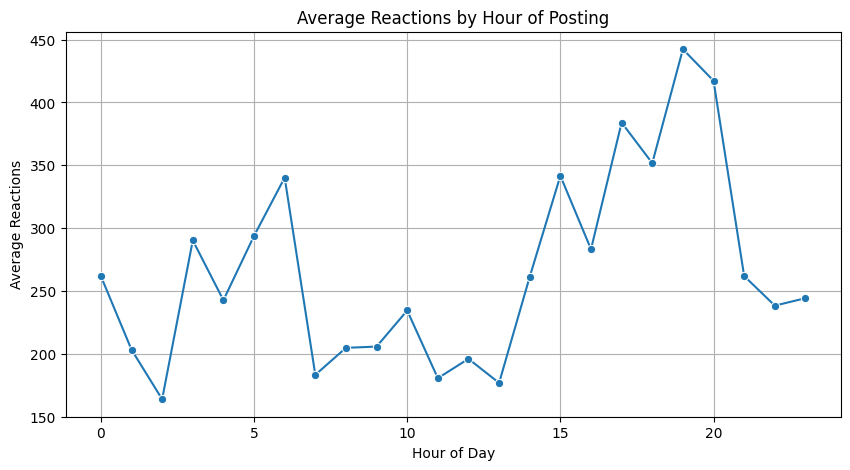

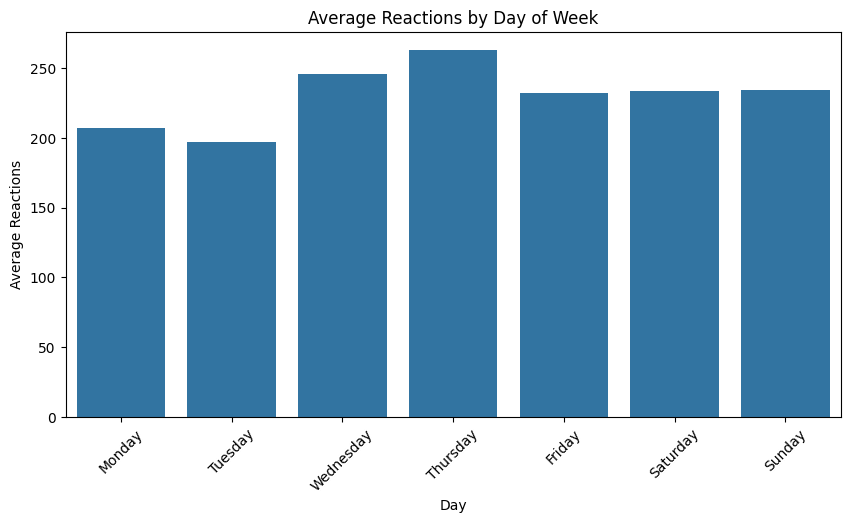

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average reactions by hour
avg_hourly = df.groupby('published_hour')['num_reactions'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_hourly.index, y=avg_hourly.values, marker='o')
plt.title('Average Reactions by Hour of Posting')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.grid(True)
plt.show()

# Average reactions by weekday
avg_weekday = df.groupby('published_weekday')['num_reactions'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_weekday.index, y=avg_weekday.values)
plt.title('Average Reactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Reactions')
plt.xticks(rotation=45)
plt.show()


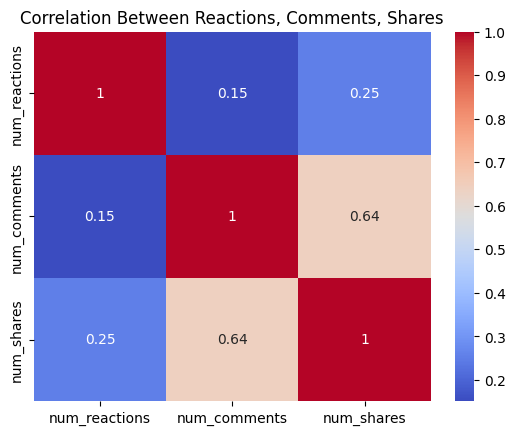

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


In [4]:
# Compute correlation
correlation = df[['num_reactions', 'num_comments', 'num_shares']].corr()

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Reactions, Comments, Shares")
plt.show()

print(correlation)


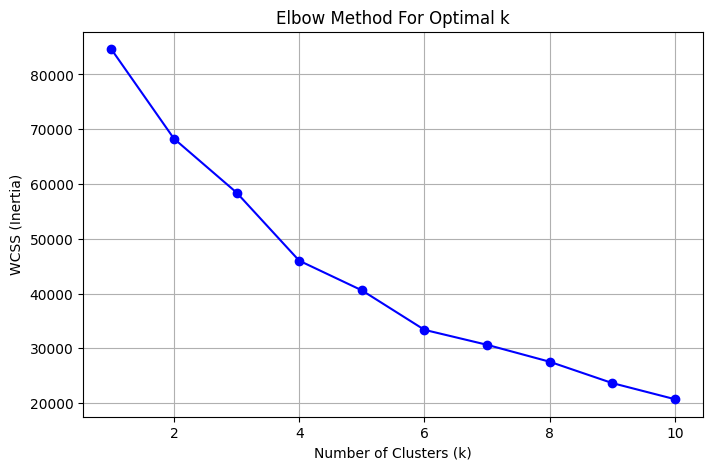

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Select columns
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
            'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df_cluster = df[features].copy()

# One-hot encode status_type
df_cluster = pd.get_dummies(df_cluster, columns=['status_type'], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Elbow method to find optimal number of clusters
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [6]:
post_type_counts = df['status_type'].value_counts()
print("Post Type Counts:")
print(post_type_counts)


Post Type Counts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [7]:
average_engagement = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average Engagement Metrics by Post Type:")
print(average_engagement)


Average Engagement Metrics by Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
